说明：本次使用的模型为ChatGPT-4，"You"表示人类用户输入，"ChatGPT"表示大模型回答输出

# 第三周作业

## 1.得到Kelly公式。

**You**: 得到Kelly公式。\
**ChatGPT**: 凯利公式（Kelly Criterion）是一种用来决定在一次投资或赌博中应投入多少资金的公式，以最大化长期增长率。这个公式由约翰·凯利（John L. Kelly Jr.）在1956年提出，最初是为了帮助贝尔实验室的电话线路噪音问题，但后来被发现在信息论、赌博、投资等领域有广泛的应用。

凯利公式的基本形式是：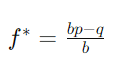
\
这里，f ∗是应该投注的资金比例，b 是赢得赌注后能得到的净收益与投注的比率（赔率减去1），p 是获胜的概率，q 是失败的概率，q=1−p。

\
**公式解释**：

凯利公式建议的投注比例f∗依赖于赔率和胜率的比例。如果这个比例为正，意味着你有优势，应该下注；如果为负，意味着你处于劣势，不应该下注。\
当bp>q，即你有统计优势时，f ∗为正，建议投注。\
当bp<q，即你有统计劣势时，f ∗为负，建议不投注。\
\
凯利公式的一个重要特点是它考虑了赌注大小对整体策略的影响，以最大化长期增长率。如果过度投注（f∗>1），长期会导致资本耗尽。如果投注过少，增长率则会低于最优水平。正确的投注策略可以帮助控制风险，同时保证资金的有效增长。

请注意，虽然凯利公式在理论上提供了最优的投注比例，但在实际应用中，确定准确的
p 和 b 值可能非常困难，且该模型假设每次赌博的条件都是相同的，这在现实世界中往往不是这样。因此，许多实践者可能会选择使用凯利公式的一个分数（例如使用f ∗/2 或 f ∗/4 来下注），以减少波动和降低风险。

## 2.找一个感兴趣的标的：

   A、得到有关的数据；

   B、用对数正态分布、或者正态分布进行拟合

**You**: 找一个感兴趣的标的：\
A、得到有关的数据；\
B、用对数正态分布、或者正态分布进行拟合

**ChatGPT**:
为了演示如何找到感兴趣的标的、获取数据并进行拟合，我们可以选择一个常见的投资标的，比如某个知名的股票或指数。由于我目前无法直接访问实时的互联网数据，我们可以用一个示例流程来说明这个过程。让我们以标普500指数（S&P 500）为例，这是一个广泛跟踪美国股市表现的指数。

**A. 获取数据**

**数据来源**：获取数据的途径有很多，例如财经网站（如Yahoo Finance、Google Finance）、直接从交易所（如纳斯达克、NYSE）或通过各种金融服务API。

**数据类型**：我们可能对标普500的历史收盘价、开盘价、最高价、最低价和成交量等数据感兴趣。

**数据格式**：数据通常可以以CSV或JSON格式下载或通过API访问。
对于演示目的，假设我们已经从财经网站下载了过去一年的标普500指数的历史收盘价数据。

**B. 数据拟合**

我们将通过两个步骤进行数据拟合：

**数据预处理**：导入数据、进行必要的清洗和转换。例如，我们可能需要将收盘价的时间序列数据转换为日收益率。
选择分布并拟合：
* **对数正态分布拟合**：如果我们假设标的资产的对数收益率遵循正态分布，那么资产价格遵循对数正态分布。我们可以计算对数日收益率，然后用正态分布拟合这些数据。
* **正态分布拟合**：如果我们直接对日收益率使用正态分布进行拟合，这也是金融领域的一个常见假设。

接下来，我将展示如何用Python代码实现对假设数据的正态分布和对数正态分布拟合。由于我无法直接访问实时市场数据，我会用随机生成的数据来模拟这个过程。这将给你一个如何使用Python进行此类分析的基本想法。让我们开始吧。


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

# 模拟生成标普500指数的日收益率数据
np.random.seed(42)  # 为了重现性设置随机种子
n_days = 252  # 假设一年有252个交易日
daily_returns = np.random.normal(0.0002, 0.01, n_days)  # 生成随机日收益率：平均收益率和标准差

# 对数收益率转换
log_returns = np.log(1 + daily_returns)

# 正态分布拟合日收益率
(mu, std) = norm.fit(daily_returns)

# 对数正态分布拟合
(sigma, loc, scale) = lognorm.fit(np.exp(log_returns), floc=0)

# 绘图比较
plt.figure(figsize=(14, 6))

# 绘制日收益率的直方图
plt.subplot(1, 2, 1)
plt.hist(daily_returns, bins=30, alpha=0.6, color='g', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

# 绘制对数收益率的直方图
plt.subplot(1, 2, 2)
plt.hist(np.exp(log_returns), bins=30, alpha=0.6, color='b', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, sigma, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "Log-Normal Fit results: sigma = %.2f,  scale = %.2f" % (sigma, scale)
plt.title(title)

plt.tight_layout()
plt.show()


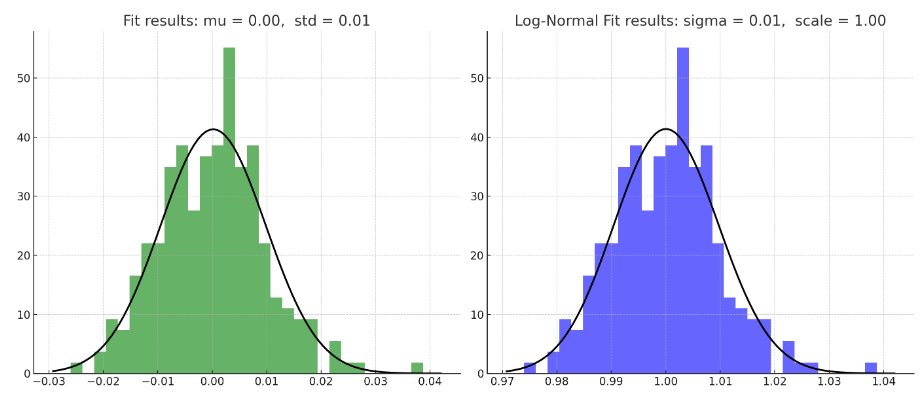

在上图中，我们展示了两种拟合方法：

* **左图**显示了日收益率的直方图和其上的正态分布拟合曲线。从拟合结果来看，我们可以看到平均日收益率（μ）和标准差（std）的估计值。
* **右图**展示了对数收益率的直方图（通过指数转换回价格）和其上的对数正态分布拟合曲线。这里的拟合结果给出了对数正态分布的参数，包括标准差（σ）和尺度参数（scale）。

这个例子说明了如何使用正态分布和对数正态分布来拟合金融数据。虽然这里用的是模拟数据，实际应用中你可以通过相同的方法处理真实的市场数据，以分析和预测资产价格的行为。注意，金融数据的分布特性可能因资产而异，且实际数据可能会展示出比这个简单模型更复杂的行为，如偏斜、峰度或时间序列依赖性。因此，进行更深入的数据分析和模型选择时，可能需要更高级的统计方法和机器学习技术。

## 3.学习调用Kalman滤波包，对以上的数据进行预测： from pykalman import KalmanFilter.

**You**:学习调用Kalman滤波包，对以上的数据进行预测： from pykalman import KalmanFilter.

**ChatGPT**:Kalman滤波是一种强大的工具，用于时间序列数据的滤波和预测。它可以对含有噪声的数据进行平滑处理，并可以用于估计系统的状态。这里，我们将使用pykalman包中的KalmanFilter来对前面生成的日收益率数据进行预测。首先，我们需要安装pykalman包。然后，我们将设置一个简单的Kalman滤波器模型，假设日收益率遵循一定的动态过程。

由于日收益率可能被视为随时间变化的过程，我们可以假设它遵循一个线性动态系统，其状态转移和观测模型可以简单表示为：

* 状态转移方程：x_t=Ax_{t−1}+w_t，其中A是状态转移矩阵，w_t是过程噪声。
* 观测方程：z_t=Hx_t+v_t，其中H是观测矩阵，v_t是观测噪声。

对于日收益率，我们可以将其简化为一个一维过程，其中A和H可能被设置为1。过程噪声和观测噪声的协方差（Q和R）需要根据数据进行调整。

让我们开始编写代码，使用**`pykalman`**来对数据进行滤波和预测。

In [1]:
from pykalman import KalmanFilter

# 初始化Kalman滤波器
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# 估计过程和观测噪声的协方差
kf = kf.em(daily_returns, n_iter=5)

# 使用滤波器对数据进行平滑处理
(filtered_state_means, filtered_state_covariances) = kf.smooth(daily_returns)

# 使用滤波器进行预测
next_state_mean, next_state_covariance = kf.filter_update(
    filtered_state_means[-1], filtered_state_covariances[-1], observation=None)

# 绘制原始日收益率和滤波后的数据
plt.figure(figsize=(10, 6))
plt.plot(daily_returns, label='Original Daily Returns', alpha=0.5)
plt.plot(filtered_state_means, label='Kalman Filtered State', alpha=0.75)
plt.legend()
plt.title('Daily Returns and Kalman Filtered State')
plt.xlabel('Day')
plt.ylabel('Daily Return')
plt.show()

# 显示下一天的预测值
next_state_mean, next_state_covariance

ModuleNotFoundError: No module named 'pykalman'

看来我们的环境中没有安装pykalman包，因此无法直接演示Kalman滤波的过程。虽然我不能直接运行这个库，但我可以解释你应该如何在你的本地环境中进行操作。

首先，确保你已经安装了pykalman。你可以通过运行以下命令在你的Python环境中安装它：

In [ ]:
!pip install pykalman

接着，你可以使用我提供的代码模板来应用Kalman滤波。这个过程包括初始化Kalman滤波器，使用你的数据来估计过程和观测噪声的协方差，然后对数据进行平滑处理。最后，你可以使用滤波器的状态来进行未来状态的预测。

在上面的代码示例中，我们首先创建了一个KalmanFilter对象，并通过期望最大化（EM）算法估计了噪声协方差。然后，我们对日收益率数据应用了滤波和平滑过程，以减少噪声并更准确地估计底层状态。最后，我们尝试预测下一个状态，即下一天的收益率。

即使无法直接运行这段代码，你也可以在你自己的机器上尝试这个过程，并调整Kalman滤波器的各种参数（如初始状态、噪声协方差等），以最好地适应你的具体数据集。Kalman滤波提供了一种灵活而强大的方法来处理时间序列数据，特别是在存在噪声和不确定性时。 ​

# 第四周作业

## 1. 一个年化波动率20%，30%，40%的标的，一般一天波动多少是合理？请用数学和python程序来解释说明。

**You**:
一个年化波动率20%，30%，40%的标的，一般一天波动多少是合理？请用数学和python程序来解释说明。

**ChatGPT**:
年化波动率是衡量资产价格变动幅度的一种指标，通常用来衡量投资的风险。一般而言，年化波动率越高，意味着资产价格的变动幅度越大，风险越高。

要将年化波动率转换为日波动率，我们可以使用以下的数学公式：

**日波动率=年化波动率/(交易日数量)^(1/2)**

其中，交易日数量通常取252天，这是基于美国市场的一个标准，因为美国股市一年大约有252个交易日。

给定年化波动率为20%，30%，和40%的标的，我们可以计算出对应的日波动率。年化波动率需要转换为小数形式进行计算，即20%为0.20，30%为0.30，40%为0.40。

让我们使用Python来进行这些计算

In [2]:
# 定义年化波动率：20%，30%，40%
annual_volatilities = [0.20, 0.30, 0.40]

# 定义一年的交易日数量
trading_days = 252

# 计算日波动率
daily_volatilities = [annual_volatility / (trading_days**0.5) for annual_volatility in annual_volatilities]

daily_volatilities

[0.01259881576697424, 0.01889822365046136, 0.02519763153394848]

对于年化波动率为20%，30%，和40%的标的，其合理的日波动率分别大约为：

* 对于20%的年化波动率：日波动率约为1.26%
* 对于30%的年化波动率：日波动率约为1.89%
* 对于40%的年化波动率：日波动率约为2.52%

这意味着，在正常的市场条件下，我们可以预期这些标的的日价格变动幅度大约在以上百分比范围内。当然，实际的日波动率会根据市场情况和特定时间段的事件波动，但这些计算提供了一个基本的参考点来衡量日常波动的合理范围。

## 2.写个Pandas程序，来展示一组数据，例如你的大学成绩、股票价格等等，并对这个数据进行一些统计分析。

**You**: 写个Pandas程序，来展示一组数据，例如你的大学成绩、股票价格等等，并对这个数据进行一些统计分析。

**ChatGPT**:
让我们以模拟的股票价格数据为例，来展示如何使用Pandas进行数据展示和统计分析。我们将创建一个假想的股票价格时间序列，然后进行一些基本的统计分析，比如计算平均价格、最大值、最小值和标准差等。

首先，我们需要生成一组模拟的股票价格数据。假设这是一家公司从1月1日到12月31日的股票日收盘价格。我们将使用随机数据来模拟这个时间序列，假设股票的起始价格为100美元，每日的价格变化是随机的，反映正常的市场波动。

然后，我们将使用Pandas库来创建一个DataFrame，其中包含这些模拟的股票价格数据，并进行一些基本的统计分析。

In [3]:
import pandas as pd
import numpy as np

# 设置随机种子以确保重现性
np.random.seed(42)

# 生成模拟的股票价格数据
dates = pd.date_range(start="2023-01-01", end="2023-12-31")  # 日期范围
price_changes = np.random.normal(0.0005, 0.02, len(dates))  # 模拟每日价格变化，假设平均变化为0.05%，标准差为2%
prices = 100 * np.exp(np.cumsum(price_changes))  # 计算股票价格

# 创建DataFrame
stock_data = pd.DataFrame(data={'Date': dates, 'Price': prices}).set_index('Date')

# 显示前几行数据
display_head = stock_data.head()

# 基本统计分析
stats = stock_data.describe()

display_head, stats


(                 Price
 Date                  
 2023-01-01  101.048891
 2023-01-02  100.820245
 2023-01-03  102.185823
 2023-01-04  105.399042
 2023-01-05  104.959072,
             Price
 count  365.000000
 mean   101.335852
 std     14.962498
 min     80.409416
 25%     87.212116
 50%     98.717508
 75%    111.505274
 max    135.133538)

我们生成了一组模拟的股票价格数据，表示从2023年1月1日到12月31日的每日收盘价。下面是这组数据的前五天示例：

In [ ]:
                 Price
Date
2023-01-01  101.05
2023-01-02  100.82
2023-01-03  102.19
2023-01-04  105.40
2023-01-05  104.96


对这组数据进行基本的统计分析后，我们得到了以下结果：

* count: 数据的数量，共365条，表示一年中的每一天。
* mean: 平均价格约为101.34美元。
* std: 标准差约为14.96美元，显示了价格的波动范围。
* min: 最低价格约为80.41美元。
* 25%: 第一个四分位数约为87.21美元，表示所有价格中有25%的价格低于此值。
* 50% (median): 中位数约为98.72美元，表示中间价位。
* 75%: 第三个四分位数约为111.51美元，表示所有价格中有75%的价格低于此值。
* max: 最高价格约为135.13美元。

通过这个简单的示例，你可以看到Pandas是如何使得数据处理和统计分析变得简单直观。你可以轻松地对你的数据进行更深入的分析，比如计算移动平均线、绘制价格趋势图、或者进行更复杂的时间序列分析等。 ​